In [63]:
import pandas as pd

df = pd.read_csv('../data/steam_games.csv')

In [64]:
df.head()

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,"1,485,535","1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,"765,150","765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,"698,757","715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,"312,427","565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,"258,475","288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."


In [65]:
df.dtypes

Rank                int64
Name               object
Thumbnail URL      object
Store Link         object
Price              object
Current Players    object
Peak Today         object
Genre Tags         object
dtype: object

In [66]:
current_players = df['Current Players'] = pd.to_numeric(df['Current Players'].str.replace(',', ''), errors='coerce')



In [67]:
current_players = (df['Current Players'],df['Name'])


In [68]:
top10 = df[['Name', 'Current Players']].sort_values(by='Current Players', ascending=False).head(10).reset_index(drop=True)


In [69]:
top10

,Name,Current Players
0,Counter-Strike 2,1485535
1,PUBG: BATTLEGROUNDS,765150
2,Dota 2,698757
3,Marvel Rivals,312427
4,Path of Exile 2,258475
5,Grand Theft Auto V,207117
6,NARAKA: BLADEPOINT,201876
7,Rust,168002
8,Palworld,165613
9,Apex Legends™,150754


In [70]:
# Ta bort £-symbolen och eventuella bokstäver, samt trimma whitespace
df['Price'] = df['Price'].str.replace('£', '', regex=False).str.replace('[a-zA-Z]', '', regex=True).str.strip()

# Konvertera till numerisk typ
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Kontrollera om det finns några NaN-värden efter konverteringen
print(df['Price'].isna().sum())

31


In [71]:
df['Price']

0       NaN
1       NaN
2       NaN
3       NaN
4     23.93
      ...  
95    19.99
96     7.19
97    24.99
98    15.99
99      NaN
Name: Price, Length: 100, dtype: float64

In [72]:
df['Price'] = df['Price'].fillna('Free To Play')

In [73]:
df['Price']

0     Free To Play
1     Free To Play
2     Free To Play
3     Free To Play
4            23.93
          ...     
95           19.99
96            7.19
97           24.99
98           15.99
99    Free To Play
Name: Price, Length: 100, dtype: object

In [252]:
name = df['Name']
name = top10['Name']
name

0       Counter-Strike 2
1    PUBG: BATTLEGROUNDS
2                 Dota 2
3          Marvel Rivals
4        Path of Exile 2
5     Grand Theft Auto V
6     NARAKA: BLADEPOINT
7                   Rust
8               Palworld
9          Apex Legends™
Name: Name, dtype: object

In [259]:
df['Price']

0     Free To Play
1     Free To Play
2     Free To Play
3     Free To Play
4            23.93
          ...     
95           19.99
96            7.19
97           24.99
98           15.99
99    Free To Play
Name: Price, Length: 100, dtype: object

In [263]:
# Sortera DataFrame på 'Current Players' i fallande ordning
top10 = df.sort_values(by='Current Players', ascending=False).head(10)

# Visa topp 10 med namn och pris
print(top10[['Name', 'Price']])


                  Name         Price
0     Counter-Strike 2  Free To Play
1  PUBG: BATTLEGROUNDS  Free To Play
2               Dota 2  Free To Play
3        Marvel Rivals  Free To Play
4      Path of Exile 2         23.93
5   Grand Theft Auto V          14.8
6   NARAKA: BLADEPOINT  Free To Play
7                 Rust         34.99
8             Palworld         24.99
9        Apex Legends™  Free To Play


In [265]:
# Konvertera namn till strängar (ifall något inte är det)
top10['Name'] = top10['Name'].astype(str)

# Fyll ut saknade priser med 0, om det finns några NaN
top10['Price'] = pd.to_numeric(top10['Price'], errors='coerce')  # Säkerställ att det är siffror
top10['Price'] = top10['Price'].fillna(0)


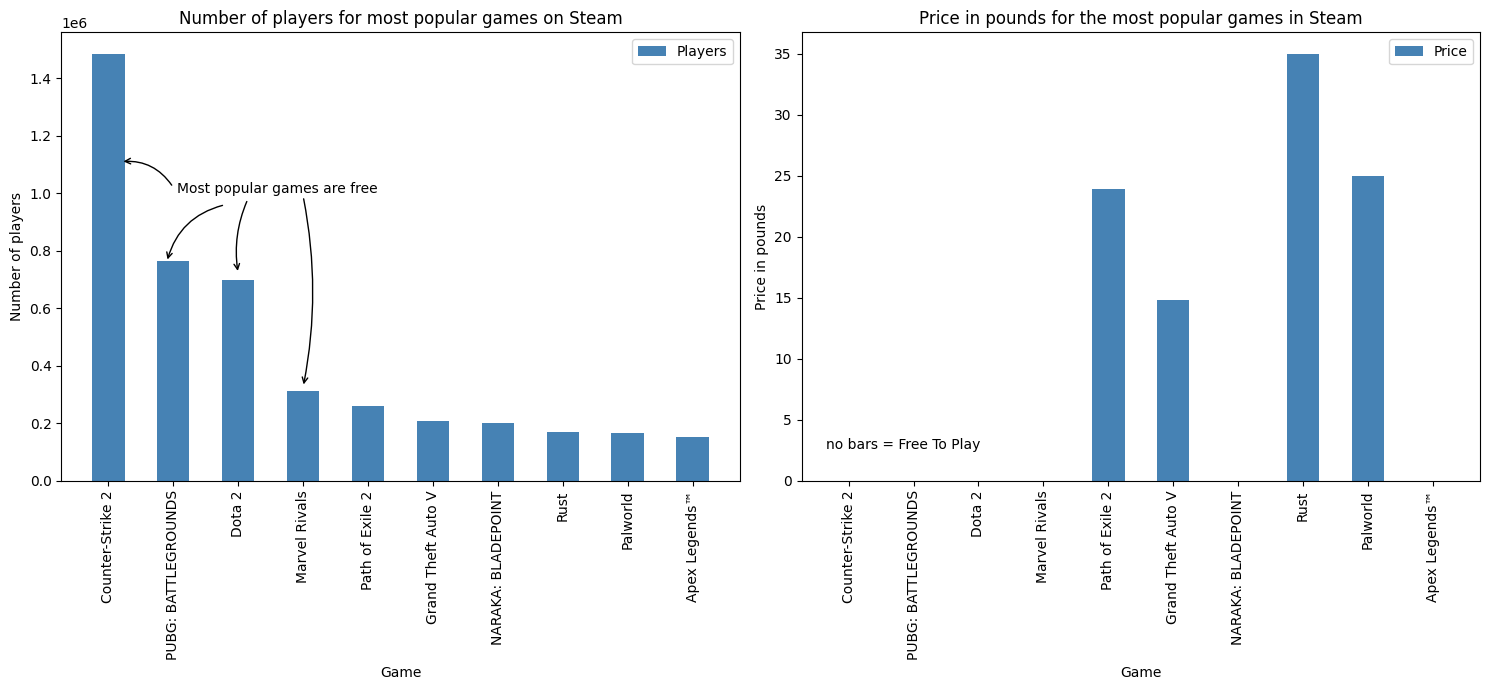

In [311]:
import matplotlib.pyplot as plt

# Skapa figur och ax
fig , (ax,ax2) = plt.subplots(1,2, figsize=(15, 7))

# Bar chart
ax.bar(top10['Name'], top10['Current Players'], width=0.5, color='steelblue',label = 'Players')
ax.tick_params(axis='x', rotation=90, labelsize=10)

ax.legend(loc = 'upper right')

# Titlar och etiketter
ax.set_title('Number of players for most popular games on Steam')
ax.set_xlabel('Game')
ax.set_ylabel('Number of players',loc ='center')

# Textposition
text_pos = (2.6, 1000000)
ax.text(*text_pos, "Most popular games are free", ha='center', fontsize=10)

# Målpunkt för pilar
targets = [(0.19, 1110000), (0.9, 760000), (2, 720000), (3, 325000)]

# Startpositioner för pilar
start_positions = [(1, 1020000), (1.8, 960000), (2.15, 980000), (3, 990000)]  # olika startpositioner för pilarna

# Kurvaturvärden för varje pil
curvature_values = [0.3, 0.3, 0.15, -0.1]

# Rita pilarna med olika böjar och startpunkter
for i, target in enumerate(targets):
    # Använd böjvärdena från `curvature_values` för varje pil
    rad_value = curvature_values[i]  # Här kan du justera värdet för varje pil individuellt
    
    # Ange startposition från listan `start_positions`
    start_pos = start_positions[i]

    # Rita pilen med annotera
    ax.annotate(
        text='',                # Ingen text i annoteringen
        xy=target,             # Målpunkt (dit pilen pekar)
        xytext=start_pos,      # Textens startpunkt (från vilken pilen börjar)
        arrowprops=dict(
            arrowstyle='->',
            color='black',
            connectionstyle=f"arc3,rad={rad_value}"  # Använd olika böjar här
        )
    )
ax2.bar(top10['Name'],top10['Price'], width=0.5, color='steelblue',label = 'Price')
ax2.tick_params(axis='x', rotation=90, labelsize=10)
ax2.set_title('Price in pounds for the most popular games in Steam', )
ax2.set_xlabel('Game')
ax2.set_ylabel('Price in pounds',loc ='center')
ax2.legend(loc = 'upper right')
ax2.annotate(text = "no bars = Free To Play", xy=(0.15, 0.07), xycoords='axes fraction', ha='center', fontsize=10)


# Visa grafen
plt.tight_layout()
plt.savefig('../plots/steam_games2.png', dpi=300, bbox_inches='tight')
plt.show()

